Data Preparation and Cleaning
Load the dataset into a data frame using Pandas

*   Load the dataset into a data frame using Pandas
*   Explore the number of rows & columns, ranges of values etc.
*   Handle missing, incorrect and invalid data


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
vaccinations_df = pd.read_csv('/content/drive/MyDrive/Dataset/country_vaccinations.csv')
vaccinations_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [28]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31559 non-null  object 
 1   iso_code                             31559 non-null  object 
 2   date                                 31559 non-null  object 
 3   total_vaccinations                   17668 non-null  float64
 4   people_vaccinated                    16825 non-null  float64
 5   people_fully_vaccinated              14056 non-null  float64
 6   daily_vaccinations_raw               14610 non-null  float64
 7   daily_vaccinations                   31315 non-null  float64
 8   total_vaccinations_per_hundred       17668 non-null  float64
 9   people_vaccinated_per_hundred        16825 non-null  float64
 10  people_fully_vaccinated_per_hundred  14056 non-null  float64
 11  daily_vaccinations_per_milli

In [29]:
vaccinations_df.shape

(31559, 15)

In [30]:
for column in vaccinations_df.columns:
    print(column)

country
iso_code
date
total_vaccinations
people_vaccinated
people_fully_vaccinated
daily_vaccinations_raw
daily_vaccinations
total_vaccinations_per_hundred
people_vaccinated_per_hundred
people_fully_vaccinated_per_hundred
daily_vaccinations_per_million
vaccines
source_name
source_website


In [31]:
vaccinations_df.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,1.766800e+04,1.682500e+04,1.405600e+04,1.461000e+04,3.131500e+04,17668.000000,16825.000000,14056.000000,31315.000000
mean,1.240539e+07,5.822263e+06,3.366567e+06,2.296473e+05,1.163343e+05,29.738031,19.384460,12.542610,3452.016957
std,6.878632e+07,2.147658e+07,1.254347e+07,1.260373e+06,8.483272e+05,35.368054,20.860233,16.033151,4571.311823
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.290522e+05,1.014510e+05,4.866350e+04,4.355500e+03,8.540000e+02,3.020000,2.600000,1.330000,417.000000
50%,9.130615e+05,6.517070e+05,3.706940e+05,2.148850e+04,6.555000e+03,14.855000,10.940000,5.680000,1879.000000
75%,4.328477e+06,2.876633e+06,1.686008e+06,9.585425e+04,3.613800e+04,45.262500,31.410000,18.012500,5189.000000
max,1.456557e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000


In [32]:
vaccinations_df.isnull().sum()

,0
country,0
iso_code,0
date,0
total_vaccinations,13891
people_vaccinated,14734
people_fully_vaccinated,17503
daily_vaccinations_raw,16949
daily_vaccinations,244
total_vaccinations_per_hundred,13891
people_vaccinated_per_hundred,14734


In [33]:
vaccinations_df.fillna(value = 0, inplace = True)
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...


In [34]:
vaccinations_df['date'].min()

'2020-12-02'

In [35]:
vaccinations_df['date'].max()

'2021-07-18'

In [36]:
type(vaccinations_df['date'].max())

str

In [37]:
date = vaccinations_df.date.str.split('-', expand = True)
date

,0,1,2
0,2021,02,22
1,2021,02,23
2,2021,02,24
3,2021,02,25
4,2021,02,26
...,...,...,...
31554,2021,07,11
31555,2021,07,12
31556,2021,07,13
31557,2021,07,14


In [38]:
# We are adding new columns for year, month, and day.
vaccinations_df['year'] = date[0]
vaccinations_df['month'] = date[1]
vaccinations_df['day'] = date[2]
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,02,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,02,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,02,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,02,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,02,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,07,11
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,07,12
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,07,13
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,07,14


In [39]:
# Changing all to numbers
vaccinations_df.year = pd.to_numeric(vaccinations_df.year)
vaccinations_df.month = pd.to_numeric(vaccinations_df.month)
vaccinations_df.day = pd.to_numeric(vaccinations_df.day)
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,11
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,12
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,13
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,14


In [40]:
vaccinations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              31559 non-null  object 
 1   iso_code                             31559 non-null  object 
 2   date                                 31559 non-null  object 
 3   total_vaccinations                   31559 non-null  float64
 4   people_vaccinated                    31559 non-null  float64
 5   people_fully_vaccinated              31559 non-null  float64
 6   daily_vaccinations_raw               31559 non-null  float64
 7   daily_vaccinations                   31559 non-null  float64
 8   total_vaccinations_per_hundred       31559 non-null  float64
 9   people_vaccinated_per_hundred        31559 non-null  float64
 10  people_fully_vaccinated_per_hundred  31559 non-null  float64
 11  daily_vaccinations_per_milli

In [41]:
# Putting new value into data
vaccinations_df.date = pd.to_datetime(vaccinations_df.date)
vaccinations_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31559 entries, 0 to 31558
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              31559 non-null  object        
 1   iso_code                             31559 non-null  object        
 2   date                                 31559 non-null  datetime64[ns]
 3   total_vaccinations                   31559 non-null  float64       
 4   people_vaccinated                    31559 non-null  float64       
 5   people_fully_vaccinated              31559 non-null  float64       
 6   daily_vaccinations_raw               31559 non-null  float64       
 7   daily_vaccinations                   31559 non-null  float64       
 8   total_vaccinations_per_hundred       31559 non-null  float64       
 9   people_vaccinated_per_hundred        31559 non-null  float64       
 10  people_ful

Exploratory Analaysis and Visualization

In [42]:
vaccinations_df.describe()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year,month,day
count,31559,3.155900e+04,3.155900e+04,3.155900e+04,3.155900e+04,3.155900e+04,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000,31559.000000
mean,2021-04-23 18:31:14.660160256,6.945036e+06,3.104014e+06,1.499429e+06,1.063135e+05,1.154348e+05,16.648548,10.334407,5.586328,3425.327514,2020.986597,4.431414,15.441617
min,2020-12-02 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,1.000000
25%,2021-03-17 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.200000e+02,0.000000,0.000000,0.000000,399.000000,2021.000000,3.000000,8.000000
50%,2021-04-29 00:00:00,2.774900e+04,1.048000e+04,0.000000e+00,0.000000e+00,6.352000e+03,0.700000,0.250000,0.000000,1841.000000,2021.000000,5.000000,15.000000
75%,2021-06-06 00:00:00,1.254232e+06,7.827445e+05,2.491715e+05,1.725450e+04,3.566150e+04,19.130000,12.415000,4.170000,5143.000000,2021.000000,6.000000,23.000000
max,2021-07-18 00:00:00,1.456557e+09,6.220000e+08,2.232990e+08,2.474100e+07,2.242429e+07,232.350000,116.660000,115.690000,118759.000000,2021.000000,12.000000,31.000000
std,NaN,5.183410e+07,1.594782e+07,8.536612e+06,8.651520e+05,8.451027e+05,30.302049,18.042005,12.383420,4563.632793,0.114997,1.893425,8.765697


In [43]:
(vaccinations_df['country'] == 'Afghanistan').value_counts()

,count
country,
False,31416
True,143


In [44]:
vaccinations_df.country.value_counts()

,count
country,
Latvia,227
Norway,226
Scotland,222
England,222
Canada,217
...,...
Niue,16
Pitcairn,7
Haiti,1


In [45]:
vaccinations_df.country.nunique()

219

In [46]:
vaccinations_df.people_fully_vaccinated.min()

0.0

In [47]:
vaccinations_df.people_fully_vaccinated.max()

223299000.0

In [48]:
vaccinations_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
0,Afghanistan,AFG,2021-02-22,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,22
1,Afghanistan,AFG,2021-02-23,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,23
2,Afghanistan,AFG,2021-02-24,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,24
3,Afghanistan,AFG,2021-02-25,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,25
4,Afghanistan,AFG,2021-02-26,0.0,0.0,0.0,0.0,1367.0,0.00,0.00,0.00,35.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,2,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31554,Zimbabwe,ZWE,2021-07-11,1491397.0,895980.0,595417.0,0.0,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,11
31555,Zimbabwe,ZWE,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,12
31556,Zimbabwe,ZWE,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,13
31557,Zimbabwe,ZWE,2021-07-14,1613640.0,988746.0,624894.0,38101.0,30698.0,10.86,6.65,4.20,2065.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1415771723...,2021,7,14


In [49]:
vaccinations_df[vaccinations_df['people_fully_vaccinated'] == vaccinations_df.people_fully_vaccinated.max()]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
5805,China,CHN,2021-06-10,845299000.0,622000000.0,223299000.0,20443000.0,17401857.0,58.73,43.21,15.51,12090.0,"CanSino, Sinopharm/Beijing, Sinopharm/Wuhan, S...",National Health Commission,http://www.nhc.gov.cn/xcs/yqjzqk/202107/a1923a...,2021,6,10


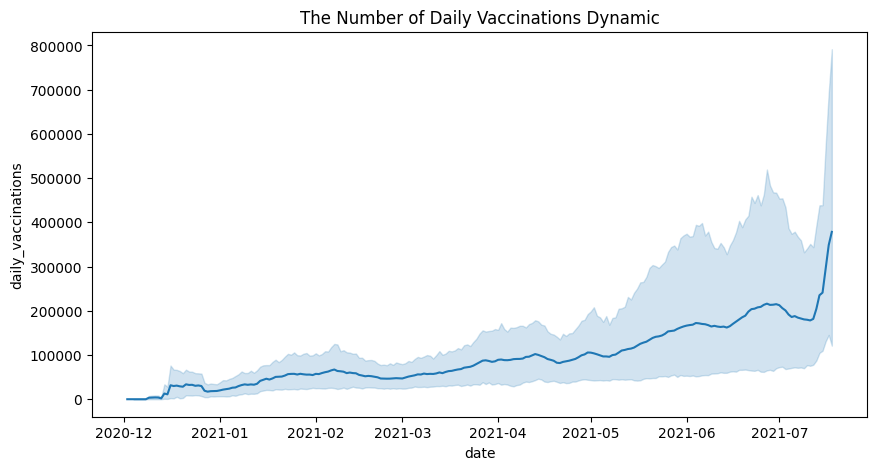

In [52]:
plt.figure(figsize = (10,5))
sns.lineplot(x = vaccinations_df.date, y = vaccinations_df.daily_vaccinations)
plt.title('The Number of Daily Vaccinations Dynamic')
plt.show()

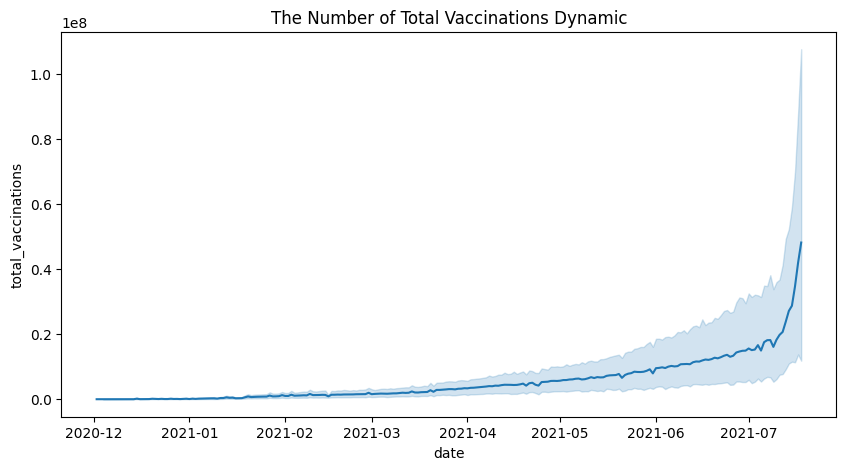

In [55]:
plt.figure(figsize = (10,5))
sns.lineplot(x = vaccinations_df.date, y = vaccinations_df.total_vaccinations)
plt.title('The Number of Total Vaccinations Dynamic')
plt.show()

In [61]:
vaccinations_df[vaccinations_df['date'] == '2021-05']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
68,Afghanistan,AFG,2021-05-01,0.0,0.0,0.0,0.0,13921.0,0.00,0.00,0.00,358.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021,5,1
254,Albania,ALB,2021-05-01,494028.0,0.0,0.0,17125.0,13423.0,17.17,0.00,0.00,4664.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...,2021,5,1
424,Algeria,DZA,2021-05-01,0.0,0.0,0.0,0.0,22664.0,0.00,0.00,0.00,517.0,"Oxford/AstraZeneca, Sputnik V",Ministry of Health,https://english.aawsat.com/home/article/301347...,2021,5,1
557,Andorra,AND,2021-05-01,0.0,0.0,0.0,0.0,124.0,0.00,0.00,0.00,1605.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of Andorra,https://www.govern.ad/covid19_newsletter/,2021,5,1
691,Angola,AGO,2021-05-01,0.0,0.0,0.0,0.0,8959.0,0.00,0.00,0.00,273.0,Oxford/AstraZeneca,World Health Organization,https://covid19.who.int/,2021,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30841,Vietnam,VNM,2021-05-01,0.0,511435.0,0.0,0.0,51087.0,0.00,0.53,0.00,525.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, ...",Government of Vietnam,https://ncov.moh.gov.vn/vi/web/guest/-/6847426...,2021,5,1
31059,Wales,OWID_WLS,2021-05-01,2624406.0,1854687.0,769719.0,12481.0,24110.0,83.24,58.83,24.41,7647.0,"Moderna, Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/vaccin...,2021,5,1
31176,Wallis and Futuna,WLF,2021-05-01,0.0,0.0,0.0,0.0,102.0,0.00,0.00,0.00,9070.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...,2021,5,1
31332,Zambia,ZMB,2021-05-01,0.0,0.0,0.0,0.0,3438.0,0.00,0.00,0.00,187.0,"Oxford/AstraZeneca, Sinopharm/Beijing",Government of Zambia,https://rtc-planning.maps.arcgis.com/apps/dash...,2021,5,1


In [74]:
countries = vaccinations_df.groupby('country')['total_vaccinations'].max().sort_values(ascending = False)[:5].index
countries

Index(['China', 'India', 'United States', 'Brazil', 'Germany'], dtype='object', name='country')

In [76]:
top_countries = pd.DataFrame(columns = vaccinations_df.columns)
top_countries

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day


In [79]:
for country in countries:
  top_countries = vaccinations_df[vaccinations_df['country'].isin(countries)]
top_countries

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year,month,day
3965,Brazil,BRA,2021-01-16,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,2021,1,16
3966,Brazil,BRA,2021-01-17,112.0,112.0,0.0,112.0,112.0,0.00,0.00,0.00,1.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,2021,1,17
3967,Brazil,BRA,2021-01-18,1109.0,1109.0,0.0,997.0,554.0,0.00,0.00,0.00,3.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,2021,1,18
3968,Brazil,BRA,2021-01-19,11470.0,11470.0,0.0,10361.0,3823.0,0.01,0.01,0.00,18.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,2021,1,19
3969,Brazil,BRA,2021-01-20,28543.0,28543.0,0.0,17073.0,7136.0,0.01,0.01,0.00,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://qsprod.saude.gov.br/extensions/DEMAS_C...,2021,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30359,United States,USA,2021-07-14,335487779.0,184835149.0,160126516.0,545543.0,548045.0,100.31,55.27,47.88,1639.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,2021,7,14
30360,United States,USA,2021-07-15,336054953.0,185135757.0,160408538.0,567174.0,529879.0,100.48,55.36,47.96,1584.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,2021,7,15
30361,United States,USA,2021-07-16,336604158.0,185424899.0,160686378.0,549205.0,519678.0,100.65,55.44,48.05,1554.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,2021,7,16
30362,United States,USA,2021-07-17,337239448.0,185765452.0,160994035.0,635290.0,524863.0,100.84,55.54,48.14,1569.0,"Johnson&Johnson, Moderna, Pfizer/BioNTech",Centers for Disease Control and Prevention,https://covid.cdc.gov/covid-data-tracker/COVID...,2021,7,17


In [82]:
top_countries['country'].value_counts()

,count
country,
China,216
United States,211
Germany,202
Brazil,184
India,184


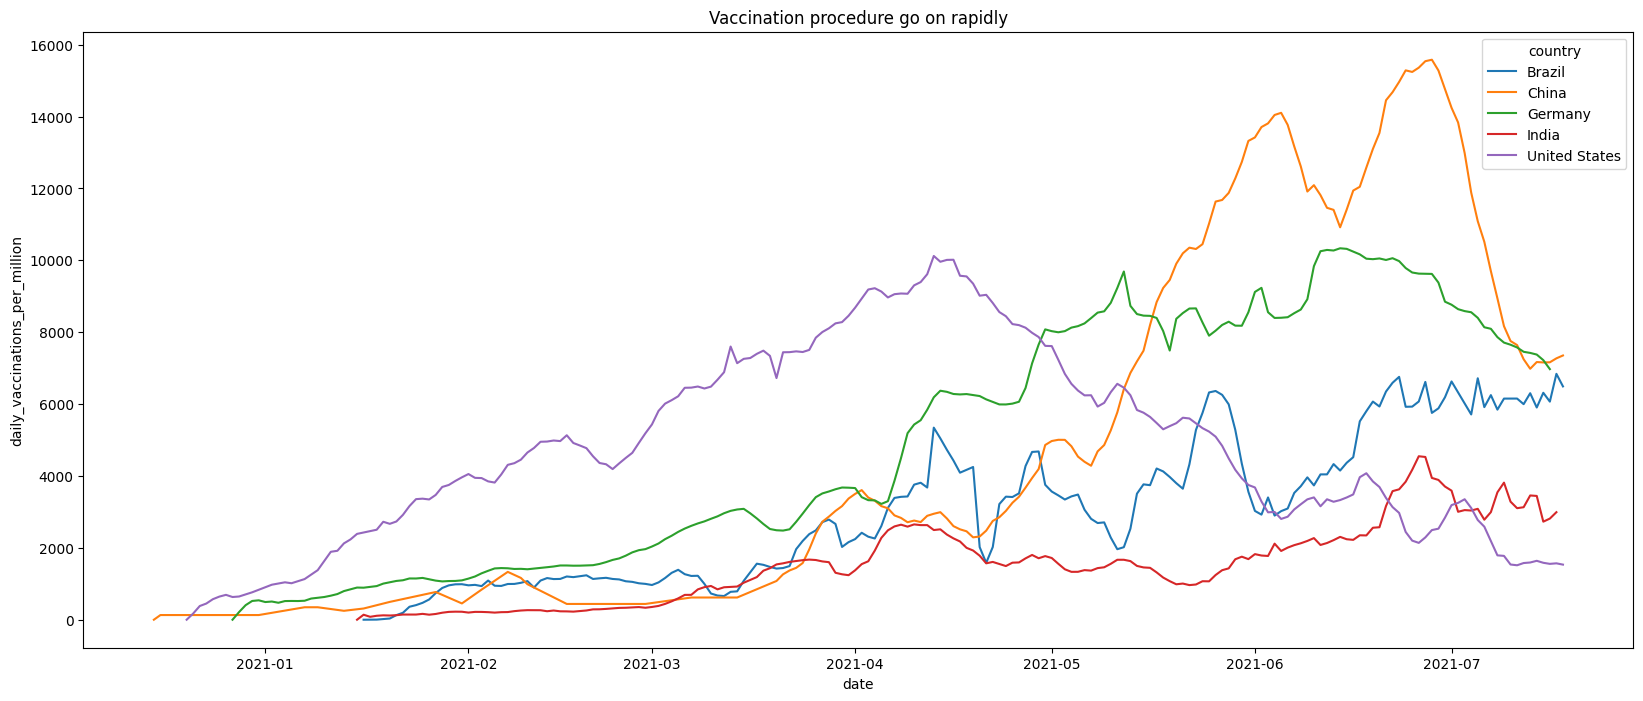

In [92]:
plt.figure(figsize=(20,8))
sns.lineplot(x = top_countries['date'],
             y = top_countries['daily_vaccinations_per_million'],
             hue= top_countries['country'])
plt.title('Vaccination procedure go on rapidly');